#### Imports

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance

#### Carregando os dados

In [14]:
df_relatorio_vendas = (
    pd.read_csv('./dataset/relatorio_vendas_etapa_5.csv', sep=';')
)

# Copiando o dataframe para manter a integridade do arquivo original

df_feature_importance = df_relatorio_vendas.copy()

#### Feature Importance

##### Medindo a correlação entre as variáveis do relatório.

<AxesSubplot:>

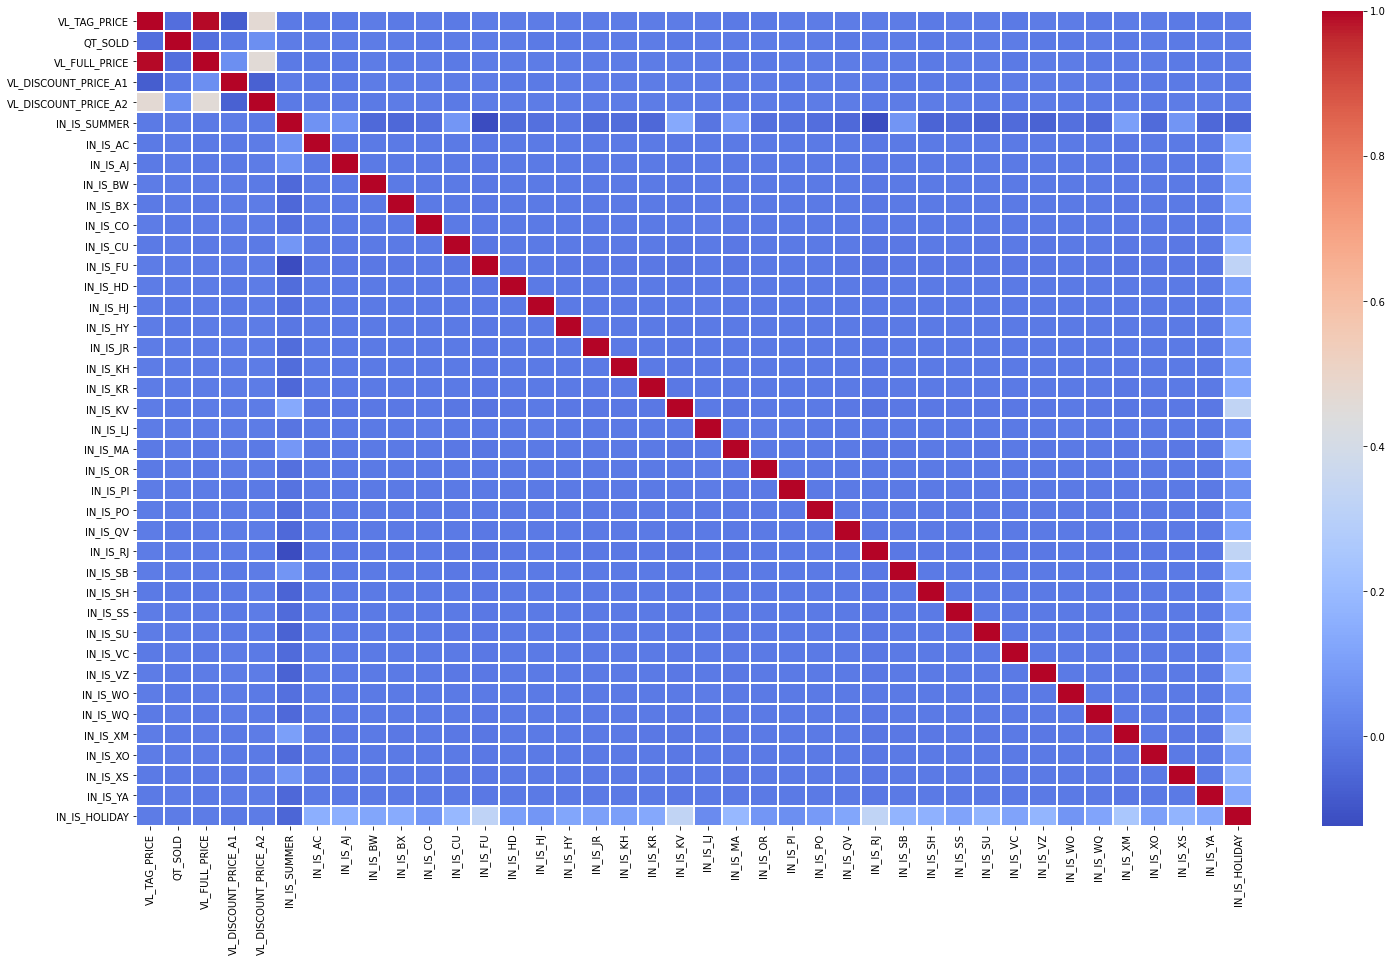

In [15]:
plt.figure(figsize=(25,15))
sns.heatmap(
    df_feature_importance.corr()
    , annot=False
    , linecolor='white'
    , linewidths=2
    , cmap='coolwarm'
)

##### Treinamento dos modelos

In [17]:
# Separando a variável target das demais.
y = df_feature_importance.pop('QT_SOLD')
X = df_feature_importance.iloc[:,2:]

#  Dividindo os dados em datasets de traino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)


**`Random Forest Regressor`**

In [ ]:

# Random Forest Regressor
feature_model = RandomForestRegressor()
feature_model.fit(X, y)

# Construindo o gráfico de importância
forest_feature_imp = pd.Series(feature_model.feature_importances_, 
                              index=X.columns).sort_values(ascending=False).nlargest(10)

sns.barplot(x=forest_feature_imp, y=forest_feature_imp.index)
plt.xlabel('Feature Importance Score Using Random Forest Regressor')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.grid(axis='x')
plt.show()

**`Permutation Feature Importance`**


In [20]:
# Construindo um regressor para a análise de permutação
model = RandomForestRegressor()
model.fit(X_train, y_train)
perm_importance = permutation_importance(model, X_test, y_test)

# Construindo o gráfico de importância
perm_feature_imp = pd.Series(perm_importance.importances_mean, 
                              index=X.columns).sort_values(ascending=False).nlargest(10)

sns.barplot(x=perm_feature_imp, y=perm_feature_imp.index)
plt.xlabel('Feature Importance Score Using Permutation importance')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.grid(axis='x')
plt.show()

**`XGBRegressor`**

In [22]:
# XGBRegressor
xgb_reg = XGBRegressor(random_state=1, n_jobs=-1)
xgb_reg.fit(X, y)

# Construindo o gráfico de importância
xgb_feature_imp = pd.Series(xgb_reg.feature_importances_,
                            index=X.columns).sort_values(ascending=False).nlargest(10)
sns.barplot(x=xgb_feature_imp, y=xgb_feature_imp.index)
plt.xlabel('Feature Importance Score Using XGBoos Regressor')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.grid(axis='x')
plt.show()

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=1,
             reg_alpha=0, reg_lambda=1, ...)

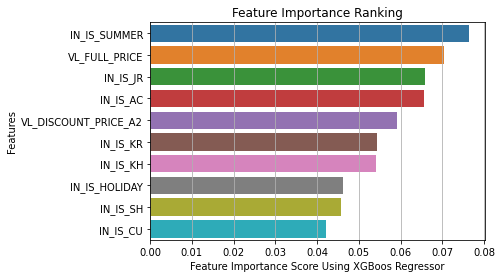

In [23]:
xgb_feature_imp = pd.Series(xgb_reg.feature_importances_,
                            index=X.columns).sort_values(ascending=False).nlargest(10)
sns.barplot(x=xgb_feature_imp, y=xgb_feature_imp.index)
plt.xlabel('Feature Importance Score Using XGBoos Regressor')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.grid(axis='x')
plt.show()

#### Feature Selection

Após aproveitarmos a etapa anterior para agregarmos valor ao estudo do time de business Inteligence, iremos dar prosseguimento a análise de importância remo-vendo as colunas que possuem uma alta colinearidade entre si e por fim, seleciona-remos as features que serão utilizadas no modelo da análise de elasticidade de pre-ço da demanda.


`VL_FULL_PRICE` é altamente correlacionado com `VL_TAG_PRICE`, quase uma correlação perfeita e apesar de ter sido classificado com uma das maiores pon-tuações de importância em todos os métodos, vamos remover esta feature do nosso estudo. Além de ter sido criada com a intenção de ser uma coluna suporte, ela leva em consideração apenas os valores máximos de um produto-cor, ou seja, se um produto teve o mesmo valor máximo por 3 anos consecutivos, a coluna `VL_FULL_PRICE` terá todos os seus valores, para o produto em questão, iguais.
`IN_IS_HOLIDAY` armazena o comportamento de todos os feriados que ocorre-ram dentro da nossa base de dados. Para o futuro, se quisermos entender o com-portamento da elasticidade de preço para um feriado específico, utilizaríamos a fea-ture relacionada ao mesmo, mas como inicialmente gostaríamos de traçar um com-portamento mais generalista do mercado chinês, decidimos manter a feature `IN_IS_HOLIDAY` e remover as features relacionadas aos outros feriados.


##### Nova análise importância 

In [24]:
# Removendo full_price
df_feature_importance.drop('VL_FULL_PRICE', axis = 1, inplace = True)

X = (df_feature_importance[
      [
          'VL_TAG_PRICE', 'IN_IS_SUMMER'
          ,'IN_IS_HOLIDAY','VL_DISCOUNT_PRICE_A1'
          ,'VL_DISCOUNT_PRICE_A2'
          ]]
)


# Dividindo os dataframes em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)

##### Construindo os novos modelos

In [25]:
# Novo random regressor
filtered_model = RandomForestRegressor()
filtered_model.fit(X, y)

# Nova permutação
perm_model = RandomForestRegressor()
perm_model.fit(X_train, y_train)
perm_importance = permutation_importance(perm_model, X_test, y_test)

# Novo XGBRegressor
filtered_xgb_reg = XGBRegressor(random_state=1, n_jobs=-1)
filtered_xgb_reg.fit(X, y)

RandomForestRegressor()

##### Mostrando os novos gráficos de importância

`Random Forest Regressor`

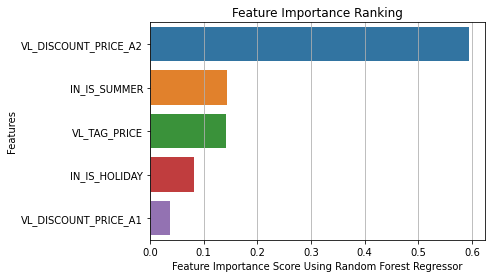

In [28]:
forest_feature_imp = pd.Series(filtered_model.feature_importances_, 
                              index=X.columns).sort_values(ascending=False).nlargest(10)

sns.barplot(x=forest_feature_imp, y=forest_feature_imp.index)
plt.xlabel('Feature Importance Score Using Random Forest Regressor')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.grid(axis='x')
plt.show()

`Permutation_importance`

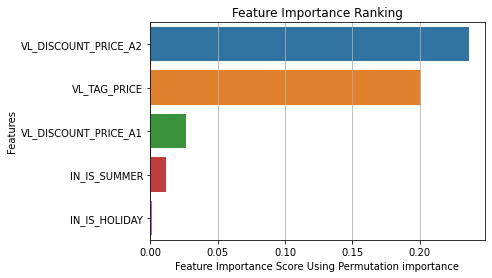

In [29]:
perm_feature_imp = pd.Series(perm_importance.importances_mean, 
                              index=X.columns).sort_values(ascending=False).nlargest(10)

sns.barplot(x=perm_feature_imp, y=perm_feature_imp.index)
plt.xlabel('Feature Importance Score Using Permutation importance')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.grid(axis='x')
plt.show()

`XGBRegressor`

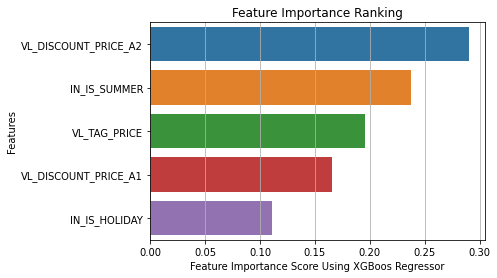

In [30]:
xgb_feature_imp = pd.Series(filtered_xgb_reg.feature_importances_,
                            index=X.columns).sort_values(ascending=False).nlargest(10)
sns.barplot(x=xgb_feature_imp, y=xgb_feature_imp.index)
plt.xlabel('Feature Importance Score Using XGBoos Regressor')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.grid(axis='x')
plt.show()

#### Exportando o dataframe devidamente organizado para ser utilizado no próximo notebook

In [31]:
# Filtrando as colunas que serão utilizadas

df_relatorio_vendas = (
    df_relatorio_vendas[[
        'DT_ORDER_DATE','CD_PRODUCT_COLOR'
        ,'QT_SOLD','VL_DISCOUNT_PRICE_A2'
        ,'VL_DISCOUNT_PRICE_A2', 'IN_IS_SUMMER'
        ,'IN_IS_HOLIDAY'
        ]]
)

# Exportando o dataframe
df_relatorio_vendas.to_csv('./dataset/relatorio_vendas_etapa_6.csv',header=True, sep=";", index=False, encoding="utf-8")